# Final analysis

This notebook contains the final form of our analysis as well as the final form of the data cleaning process.

In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
path = r'/home/daniel/code/costofcare/data/bhp_ukhls_data_stata/UKDA-6614-stata/stata/ukhls'
all_files = glob.glob(os.path.join(path , '*indresp.dta'))
raw_colnames = ['hidp',
                'sex',
                'jbnssec_dv',
                'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month']
indresp = []
prefixes = [] # for later
for filename in all_files:
    prefix = filename.split('/')[-1][0:2]
    prefixes.append(prefix)
    colnames = [f'{prefix}{x}' for x in raw_colnames]
    temp_df = pd.read_stata(filename,
                       columns=['pidp'] + colnames)
    indresp.append(temp_df)

In [2]:
for i, df in enumerate(indresp):
    df['wave'] = i+1
    df.columns = ['pidp',
                'hidp',
                'sex',
                'jbnssec_dv',
                  'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month',
                 'wave']

In [3]:
data = pd.concat(indresp)
data['max_waves'] = data.groupby('pidp')['wave'].transform('count')
len(data.pidp.unique())

88602

In [4]:
check = data[['wave', 'pidp', 'max_waves']]

In [5]:
len(check[check.max_waves > 5].pidp.unique())

40123

## Decision
We will consider that has at least six data points, whether or not they are consecutive or not, and whether or not they start from wave 1.

In [6]:
data_6 = data[data.max_waves > 5]
len(data_6.pidp.unique())

40123

# Treatment Variable

## Decision
Recoding treatment variable

In [7]:
import numpy as np
data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_5464/1074845151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',


In [8]:
data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_5464/1333873410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',


In [9]:
data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,
                                   "0 - 4 hours per week": "0-19",
                                   "proxy": np.nan,
                                   "5 - 9 hours per week": "0-19",
                                   "10 - 19 hours per week": "0-19",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "35 - 49 hours per week": "20-49",
                                   "varies 20 hours or more": "20-49",
                                   "0 - 4 hours per week": "0-19",
                                   "10-19 hours per week": "0-19",
                                   "Not available for IEMB": np.nan,
                                   "Varies 20 hours or more": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "Varies under 20 hours": "0-19",
                                   "20-34 hours per week": "20-49",
                                   "5 - 9 hours per week": "0-19",
                                   "Other": np.nan,
                                   "10 - 19 hours per week": "0-19",
                                   "35-49 hours per week": "20-49",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "50-99 hours per week": "50+",
                                   "other": np.nan,
                                   "don't know": np.nan,
                                   "35 - 49 hours per week": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "50 - 99 hours per week": "50+",
                                   "other": np.nan,
                                   "refusal": np.nan}).copy()

/tmp/ipykernel_5464/2909938044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,


## Note
The variable below identifies the people who provided care under our specific conditions based on the 3 variables above.

In [10]:
data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))

/tmp/ipykernel_5464/3799348870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))


Counting how many waves are carers taking care responsabilities on average

In [11]:
care_resp = data_6[['pidp', 'carer', 'wave']][data_6.carer]
care_resp['max_waves'] = care_resp.groupby('pidp')['wave'].transform('count')
care_resp.drop_duplicates(subset=['pidp']).max_waves.mean()

3.6293369616411115

## Decision
We will use a "generalised" moment of treatment with at least 3 measures before, and at least 1 after.

# Target Variable

In [12]:
data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here

/tmp/ipykernel_5464/2089346174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here


In [13]:
data_6.jbstat_clean.value_counts()

paid employment(ft/pt)                     187734
retired                                     99318
self employed                               31006
family care or home                         19859
unemployed                                  16201
full-time student                           15962
lt sick or disabled                         13788
on maternity leave                           2151
doing something else                         1981
on furlough                                   387
on apprenticeship                             288
unpaid, family business                       261
govt training scheme                          232
refusal                                       131
temporarily laid off/short term working        63
don't know                                     47
missing                                        29
Name: jbstat_clean, dtype: int64

In [14]:
data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",
                             "retired": "unemployed",
                       "self employed": "employed",
                       "family care or home": "unemployed",
                       "unemployed": "unemployed",
                       "full-time student": "unemployed",
                       "lt sick or disabled": "unemployed",
                       "on maternity leave": "employed",
                       "doing something else": "unemployed",
                       "on furlough": "unemployed",
                       "on apprenticeship": "employed",
                       "unpaid, family business": "unemployed",
                       "govt training scheme": "employed",
                       "refusal": np.nan,
                       "temporarily laid off/short term working": "unemployed",
                       "don't know": np.nan,
                       "missing": np.nan}
                     )

/tmp/ipykernel_5464/2757714622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",


Total Sample size

In [15]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])

,pidp,carer
1,68004087,False
2,68006127,False
4,68006807,False
11,68008847,False
12,68009527,False
...,...,...
41859,1636671692,True
41873,1638419292,True
41930,1644675490,False
41931,1644675530,False


Total number of carers in sample

In [16]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])['carer'].sum()

6529

Number of employed individuals in the sample

In [17]:
len(data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']))

29337

Number of employed carers

In [18]:
data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']).carer.sum()

4340

## Decision
We are considering only employed individuals

In [108]:
df_6_emp = data_6[(data_6.employed == 'employed')]

Cleaning wage variable

In [109]:
df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})

/tmp/ipykernel_5464/3065558054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})


In [110]:
df_6_emp.wage

1        1075.000000
11       1282.170044
12       4116.669922
14       2333.330078
16       2641.449951
            ...     
29258    4583.330078
29259    7000.000000
29260    1624.750000
29263    2800.000000
29267            NaN
Name: wage, Length: 221411, dtype: float64

Adding cpih to correct for inflation

In [111]:
cpih = pd.read_csv('./cpih_uk_88_23.csv')
cpih['date'] = pd.to_datetime(cpih.date, format='%b-%y')
cpih

,date,cpih
0,1988-01-01,46.9
1,1988-02-01,47.0
2,1988-03-01,47.2
3,1988-04-01,47.8
4,1988-05-01,48.0
...,...,...
416,2022-09-01,122.3
417,2022-10-01,124.3
418,2022-11-01,124.8
419,2022-12-01,125.3


In [112]:
df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['date'] = df_6_emp['istrtdaty'].astype(str) + '/' + df_6_emp['istrtdatm'].astype(str)
df_6_emp['date'] = df_6_emp['date'].replace({'nan/nan': np.nan})
df_6_emp['date'] = pd.to_datetime(df_6_emp['date'], format='%Y/%B')
df_6_emp = df_6_emp.merge(cpih, on='date', how='left')

/tmp/ipykernel_5464/1591602359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_5464/1591602359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_5464/1591602359.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [113]:
df_6_emp['jbhrs_clean'] = df_6_emp.jbhrs.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan, "don't know": np.nan, "refusal": np.nan, 0: np.nan})
df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan

/tmp/ipykernel_5464/295635728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan


In [114]:
df_6_emp['month_jbhrs'] = df_6_emp['jbhrs_clean'] * 4.33 # times the average amount of weeks

In [115]:
df_6_emp['wage_h'] = df_6_emp['wage'] / df_6_emp['month_jbhrs']

### Real wage calculation

In [356]:
df_6_emp['wage_h_deflated'] = (df_6_emp['wage_h'] / df_6_emp['cpih']) * 100

In [357]:
df_6_emp['wage_deflated'] = (df_6_emp['wage'] / df_6_emp['cpih']) * 100

# ISC Data preparation

In [358]:
isc_data = df_6_emp[['pidp', 'carer', 'wage_deflated', 'wage_h_deflated', 'wave', 'date', 'employed']]

In [359]:
isc_data


,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
0,68004087,False,1241.339492,7.350859,1,2009-01-01,employed
1,68008847,False,1480.565871,8.767489,1,2009-01-01,employed
2,68009527,False,4753.660418,29.671434,1,2009-01-01,employed
3,68010887,False,2694.376534,16.817780,1,2009-01-01,employed
4,68011567,False,3050.173154,19.038594,1,2009-01-01,employed
...,...,...,...,...,...,...,...
221406,1652366050,False,3971.689842,24.790524,12,2022-02-01,employed
221407,1652814850,True,6134.969325,35.421301,12,2021-11-01,employed
221408,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed
221409,1652984930,False,2441.533981,15.036391,12,2021-12-01,employed


In [360]:
isc_data[isc_data.pidp==68882647]

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
376,68882647,False,1560.900682,22.530322,1,2009-01-01,employed
15385,68882647,False,1204.449394,23.180319,2,2010-02-01,employed
34842,68882647,False,1444.561166,16.680845,3,2011-02-01,employed
54615,68882647,False,838.574423,7.746646,4,2012-03-01,employed
74818,68882647,False,412.371134,3.968159,5,2013-01-01,employed
95282,68882647,True,NaN,NaN,6,2014-02-01,employed
116320,68882647,True,NaN,NaN,7,2015-05-01,employed
136870,68882647,True,NaN,NaN,8,2016-03-01,employed
191674,68882647,True,2013.633756,13.286927,11,2019-04-01,employed


In [361]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
0,68004087,False,1241.339492,7.350859,1,2009-01-01,employed
1,68008847,False,1480.565871,8.767489,1,2009-01-01,employed
2,68009527,False,4753.660418,29.671434,1,2009-01-01,employed
3,68010887,False,2694.376534,16.817780,1,2009-01-01,employed
4,68011567,False,3050.173154,19.038594,1,2009-01-01,employed
...,...,...,...,...,...,...,...
221406,1652366050,False,3971.689842,24.790524,12,2022-02-01,employed
221407,1652814850,True,6134.969325,35.421301,12,2021-11-01,employed
221408,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed
221409,1652984930,False,2441.533981,15.036391,12,2021-12-01,employed


In [362]:
isc_copy = isc_data.copy()
to_drop = []
for pidp in isc_data.pidp.unique():
    temp_data = isc_data[isc_data.pidp==pidp].copy()
    if temp_data.wage_deflated.isnull().any():
        to_drop.append(pidp)
isc_copy = isc_copy[~isc_copy.pidp.isin(to_drop)]

In [363]:
isc_data = isc_copy.copy()

### Average number of waves caring

In [364]:
carer_events = []
for i in isc_data.pidp.unique():
    by_pidp = isc_data[isc_data.pidp == i]
    if by_pidp.carer.any():
        carer_events.append(by_pidp.carer.sum())
np.mean(carer_events)

3.1345037323748963

## Decision
We will take the average as lower limit to determine treated cases. Everyone with less than 3 and more than 1 reported waves of caring will be dropped.

In [365]:
isc_data['waves_caring'] = isc_data.groupby('pidp')['carer'].transform('sum')
isc_data = isc_data[~((isc_data.waves_caring >= 1) & (isc_data.waves_caring < 3))]

In [366]:
isc_data['wave_reindex'] = isc_data.sort_values(by=['pidp', 'wave']).groupby('pidp').cumcount() + 1
isc_data.reset_index(drop=True, inplace=True)
isc_data.sort_values(by=['pidp', 'wave_reindex'], inplace=True)

In [367]:
isc_data['wave_treat'] = isc_data.wave_reindex[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

In [368]:
isc_data['wave_treat_real'] = isc_data.wave[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

In [369]:
isc_data['initial_wave'] = isc_data.groupby('pidp')['wave'].transform('min').values

## Decision
Only carer with at least 3 data points before treatment are consider.

In [370]:
isc_data = isc_data.drop(isc_data[(isc_data.wave_treat < 4) & (isc_data.carer == True)].index)

In [371]:
def create_index(x):
    y = np.arange(len(x)) + 1
    return y - x

def create_relative_index(lst, point):
    index = lst.index(point)
    return [i - index for i in range(len(lst))]


In [372]:
isc_data['reindex'] = isc_data.groupby('pidp')['wave_treat'].transform(create_index)

In [373]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed,waves_caring,wave_reindex,wave_treat,wave_treat_real,initial_wave,reindex
56452,76165,False,2710.843373,17.887452,7,2015-03-01,employed,0,1,1,7,7,0
66420,76165,False,3486.055777,23.002678,8,2016-03-01,employed,0,2,1,7,7,1
75955,76165,False,3793.604651,125.160167,9,2017-04-01,employed,0,3,1,7,7,2
84856,76165,False,3788.772598,25.000149,10,2018-03-01,employed,0,4,1,7,7,3
93313,76165,False,4000.000000,26.393929,11,2019-03-01,employed,0,5,1,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108364,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed,0,6,1,6,6,5
56450,1652984890,False,3154.053707,33.109949,6,2015-12-01,employed,0,1,1,6,6,0
66418,1652984890,False,3110.677723,18.905298,7,2017-01-01,employed,0,2,1,6,6,1
56451,1653059650,False,2796.853049,16.148112,6,2016-02-01,employed,0,1,1,6,6,0


In [374]:
#isc_data = isc_data.dropna()

In [375]:
isc_data['ever_carer'] = isc_data.groupby('pidp')['carer'].transform(any)

In [376]:
carers = isc_data[isc_data.ever_carer]

In [377]:
controls = isc_data[~isc_data.ever_carer]

In [378]:
len(carers.pidp.unique())

702

In [379]:
def get_control_clean(c_data, t_data):
    samples = []
    t_ids = t_data.pidp.unique().tolist()
    for t_id in t_ids:
        out = {}
        init = t_data[t_data.pidp == t_id].initial_wave.unique()[0]
        treat_time = t_data[t_data.pidp == t_id].wave_treat_real.unique()[0]
        last_wave = t_data[t_data.pidp == t_id].wave.max()
        length = (last_wave + 1) - init
        # HUGE PROBLEM HERE waves need to match exactly!!! do not use range!!!
        idx = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)].groupby('pidp')['pidp'].transform('count') == length
        sub_sample = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)][idx].reset_index(drop=True)
        treat = t_data[t_data.pidp == t_id].pivot(index='wave', columns='pidp', values='wage_deflated')
        #treat.columns = ['treated']
        sub_sample = sub_sample.pivot(index='wave', columns='pidp', values='wage_deflated')
        sub_sample = pd.concat([treat, sub_sample], axis=1, join="inner")
        out['data'] = sub_sample
        out['treat_time'] = treat_time
        samples.append(out)
    return samples

In [380]:
samples = get_control_clean(controls, carers)

In [381]:
carers[carers.pidp==89124205]

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed,waves_caring,wave_reindex,wave_treat,wave_treat_real,initial_wave,reindex,ever_carer
7720,89124205,False,4279.279279,26.354299,2,2010-01-01,employed,3,1,6,9,2,-5,True
17336,89124205,False,4423.976249,27.245427,3,2011-02-01,employed,3,2,6,9,2,-4,True
36832,89124205,False,2735.046074,21.781047,5,2013-02-01,employed,3,3,6,9,2,-3,True
56904,89124205,False,1305.220884,9.419897,7,2015-03-01,employed,3,4,6,9,2,-2,True
66859,89124205,False,1318.881070,12.691311,8,2016-02-01,employed,3,5,6,9,2,-1,True
76362,89124205,True,1168.451801,11.243763,9,2017-03-01,employed,3,6,6,9,2,0,True
85245,89124205,True,944.938159,8.729221,10,2018-03-01,employed,3,7,6,9,2,1,True
93680,89124205,True,1527.777778,11.026110,11,2019-07-01,employed,3,8,6,9,2,2,True
101548,89124205,False,1669.014778,12.045430,12,2020-03-01,employed,3,9,6,9,2,3,True


In [382]:
samples[1]

{'data': pidp   68049651     68035367     68042167     68044207     68045567    \
 wave                                                                    
 1     2213.244854  2755.733945  3367.979125   808.314088  2886.836028   
 2     2158.412212  2893.258427  3847.601263   720.720721  2808.988764   
 3     1986.272975  2816.901408  4038.126362   758.396533  2723.311547   
 4     1560.874089  3010.504202  4018.907563   739.176346  2626.050420   
 5     1975.948499  5256.410256  3780.072084   769.230769  2051.282051   
 6     2228.155969  5247.225025  3899.091826   736.770953  2219.979818   
 7     2010.050251  5527.638191  3906.626506  1064.257028  2997.002997   
 8     2052.632711  5328.002076  3196.803197  1095.617530  2988.047809   
 9     1964.636542  5329.457364  3837.890625  1162.790698  3068.798450   
 10    1913.875598  5208.530806  3747.378456  1048.617731  3062.200957   
 11    1997.180451  5033.457249  3745.318352  2130.149813  3043.071161   
 12     923.361034  5315.83793

In [383]:
from typing import List
from operator import add
from toolz import reduce, partial
import numpy as np
from scipy.optimize import minimize
from sklearn.neighbors import KDTree


# the expression to minimise, since \mu is 0, we are one looking for \omega/W
def argmin_w(W, Y_i, Y_0):
    return np.sqrt(np.sum((Y_0 - Y_i.dot(W))**2))


# a function wrapping the whole process
def get_w(Y_i, Y_0):
    w_start = [1/Y_i.shape[1]]*Y_i.shape[1]
    weights = minimize(partial(argmin_w, Y_i=Y_i, Y_0=Y_0),
                       np.array(w_start),
                       method='SLSQP',
                       constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}), # constraint to sum to 1
                       bounds=[(0.0, 1.0)]*len(w_start),
                       )
    return weights.x


def isc(data_objects: list) -> dict:
    synths = []
    treats = []
    diffs = []
    std_diffs = []
    for ele in data_objects:
        data = ele['data'].copy()
        t_time = ele['treat_time']
        data.sort_index(inplace=True)
        data.index = create_relative_index(data.index.tolist(), t_time)
        df_T0 = data.loc[:-1, :] # this needs to be revised
        Y_0 = df_T0.iloc[:, 0].values
        kdt = KDTree(df_T0.T, leaf_size=30, metric='euclidean')
        idx = kdt.query(df_T0.T, k=100, return_distance=False)[0, 1:]
        Y_i = df_T0.iloc[:, idx].values
        weights = get_w(Y_i, Y_0)
        synth = data.iloc[:, idx].dot(weights) # synthetic control is now based on the new subset of observations
        treated = data.iloc[:, 0]
        #synth.plot()
        #treated.plot()
        diff = treated - synth
        diff.plot()
        std_diff = (diff - diff.mean())/ diff.std()
        #std_diff.plot()
        #std_diff_b = 
        synths.append(synth)
        treats.append(treated)
        diffs.append(diff)
        std_diffs.append(std_diff)
    return {'synths': synths, 'treats': treats, 'diffs': diffs, 'std_diffs': std_diffs}


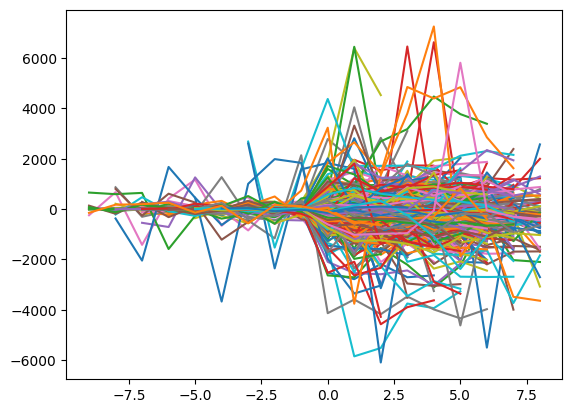

In [384]:
isc_list = isc(samples)

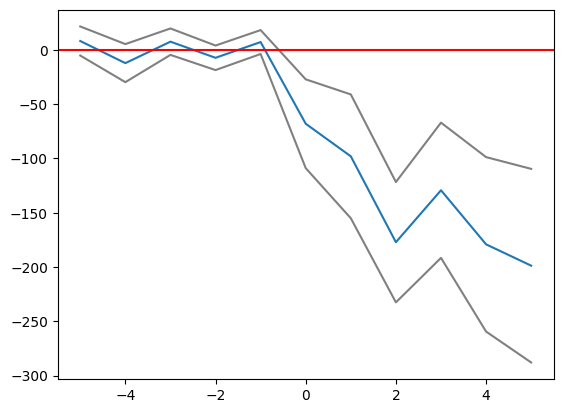

In [385]:
import math
differences = pd.concat(isc_list['diffs'], axis=1).sort_index()
differences.loc[-5:5].mean(axis=1).plot()
(differences.loc[-5:5].mean(axis=1) + (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt)))).plot(color='grey')
(differences.loc[-5:5].mean(axis=1) - (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt)))).plot(color='grey')
differences.count()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [386]:
differences.count(axis=1)

-9     14
-8     46
-7     94
-6    177
-5    303
-4    480
-3    702
-2    702
-1    702
 0    702
 1    702
 2    702
 3    620
 4    514
 5    412
 6    289
 7    152
 8     59
dtype: int64